In [61]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Lambda,Resizing,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.applications import VGG16,VGG19,ResNet50,ResNet152
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [3]:
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
(x_train,y_train),(x_test,y_test) = data

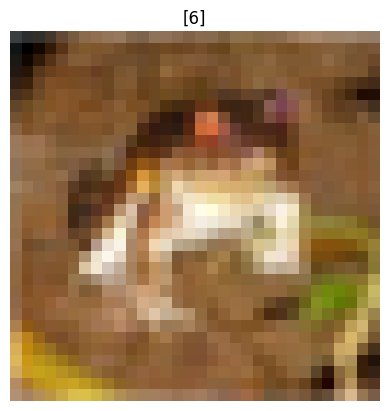

In [5]:
plt.imshow(x_train[0])
plt.title(f"{y_train[0]}")
plt.axis('off')
plt.show()

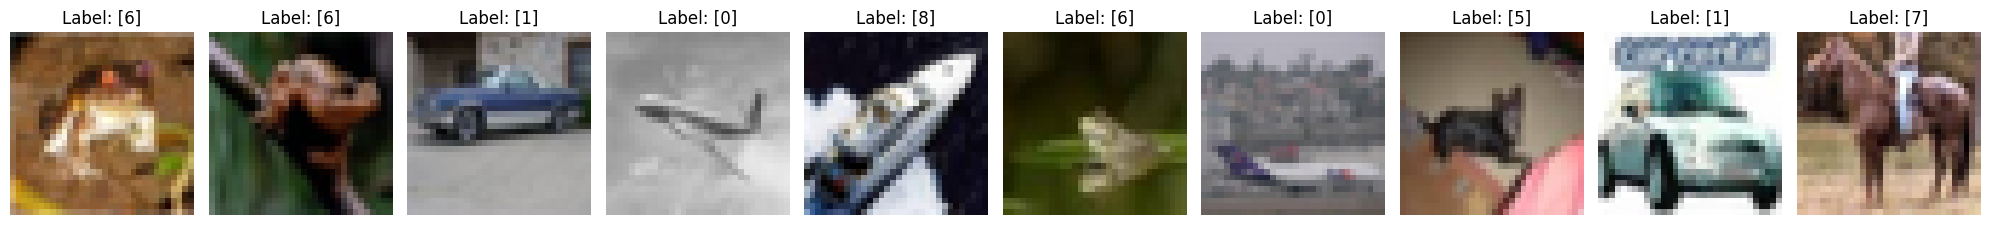

In [6]:
images = 10  # Show only 10 images
fig, ax = plt.subplots(1, images, figsize=(20, 4))

for idx in range(images):
    i = idx * 5000
    ax[idx].imshow(x_train[i])
    ax[idx].axis('off')
    ax[idx].set_title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()

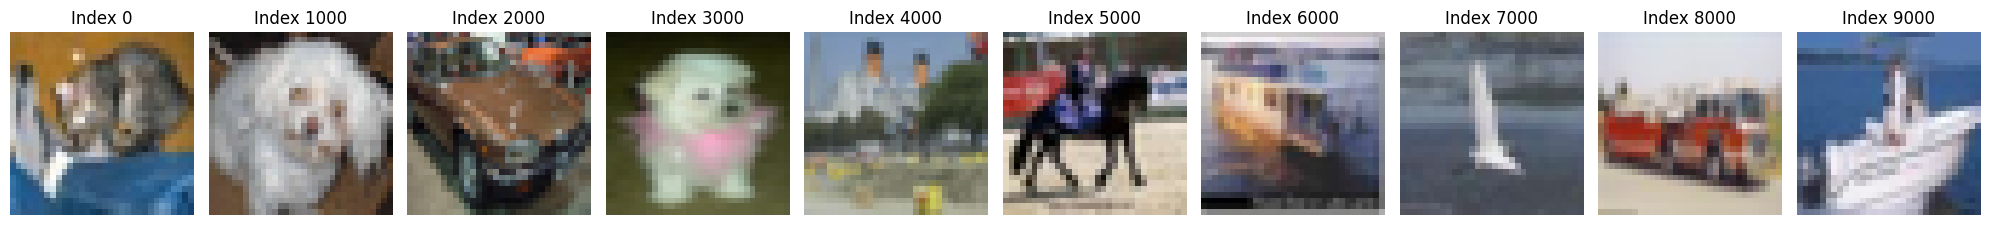

In [7]:
images = 10  # Show only 10 images
fig, ax = plt.subplots(1, images, figsize=(20, 4))

for idx in range(images):
    i = idx * 1000
    ax[idx].imshow(x_test[i])
    ax[idx].axis('off')
    ax[idx].set_title(f"Index {i}")

plt.tight_layout()
plt.show()

In [8]:
x_val = x_train[:1000]
X_train = x_train[1000:]
y_val = y_train[:1000]
Y_train = y_train[1000:]

**VGG16**

In [9]:
input_tensor = Input(shape=(32,32,3))
x = Resizing(224,224)(input_tensor)

In [10]:
vgg16 = VGG16(include_top = False,weights='imagenet',input_shape=(224,224,3))

I0000 00:00:1749390845.805551      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749390845.806249      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
for layer in vgg16.layers:
  layer.trainable = False

In [12]:
x = vgg16(x)

In [13]:
x = Flatten()(x)
x = Dense(4096,activation='relu')(x)
x = Dense(4096,activation='relu')(x)
x = Dense(1000,activation='relu')(x)
output_tensor = Dense(10,activation='softmax')(x)

In [14]:
vgg16_model = Model(inputs=input_tensor,outputs=output_tensor)

In [15]:
vgg16_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,367,554 (527.83 MB)

 Trainable params: 123,652,866 (471.70 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3
)

In [17]:
vgg16_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
vgg16_history = vgg16_model.fit(x=X_train,y=Y_train,batch_size=64,epochs=40,validation_data=(x_val,y_val),callbacks=[early_stop])

Epoch 1/40


I0000 00:00:1749390853.376194     101 service.cc:148] XLA service 0x7c25640081d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749390853.376732     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749390853.376751     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749390853.779841     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1749390871.625766     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


766/766 ━━━━━━━━━━━━━━━━━━━━ 320s 390ms/step - accuracy: 0.5891 - loss: 10.9954 - val_accuracy: 0.8140 - val_loss: 0.5885
Epoch 2/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 295s 385ms/step - accuracy: 0.8516 - loss: 0.4861 - val_accuracy: 0.8220 - val_loss: 0.5330
Epoch 3/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 294s 384ms/step - accuracy: 0.8935 - loss: 0.4007 - val_accuracy: 0.8370 - val_loss: 0.5975
Epoch 4/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 292s 382ms/step - accuracy: 0.9310 - loss: 0.2322 - val_accuracy: 0.8400 - val_loss: 0.6719
Epoch 5/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 293s 383ms/step - accuracy: 0.9436 - loss: 0.2072 - val_accuracy: 0.8340 - val_loss: 0.6664


In [19]:
vgg16_data = vgg16_history.history

In [20]:
vgg16_evaluation = vgg16_model.evaluate(x=x_test,y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 252ms/step - accuracy: 0.8326 - loss: 0.6333


In [21]:
vgg16_predictions = vgg16_model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 224ms/step


In [22]:
vgg16_final_predictions = np.argmax(vgg16_predictions,axis=1)

In [23]:
vgg16_y_pred = np.expand_dims(vgg16_final_predictions,axis=1)

In [24]:
vgg16_y_pred = vgg16_y_pred.flatten()
vgg16_y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [25]:
y_test_vgg16 = y_test.flatten()
y_test_vgg16

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [26]:
cmf = pd.crosstab(y_test_vgg16,vgg16_y_pred,rownames=['Actual'],colnames=['Predictions'])

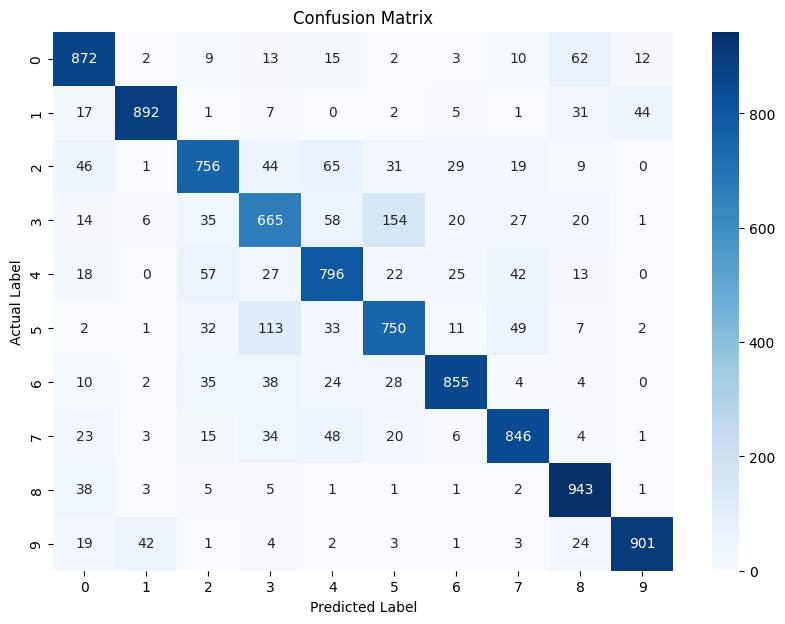

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cmf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**VGG19**

In [28]:
vgg19 = VGG19(include_top = False,weights='imagenet',input_shape=(224,224,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [29]:
for layer in vgg19.layers:
    layer.trainable = False

In [30]:
input_x1 = Input(shape=(32,32,3))
x1 = Resizing(224,224)(input_x1)

In [31]:
x1 = vgg19(x1)

In [32]:
x1 = Flatten()(x1)
x1 = Dense(4096,activation='relu')(x1)
x1 = Dense(4096,activation='relu')(x1)
x1 = Dense(1000,activation='relu')(x1)
output_vgg19 = Dense(10,activation='softmax')(x1)

In [33]:
vgg19_model = Model(inputs=input_x1,outputs=output_vgg19)

In [34]:
vgg19_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_1 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,677,250 (548.09 MB)

 Trainable params: 123,652,866 (471.70 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [35]:
vgg19_early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 3
)

In [36]:
vgg19_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
try:
    vgg19_history = vgg19_model.fit(x=X_train,y=Y_train,batch_size=64,epochs=40,validation_data=(x_val,y_val),callbacks=[vgg19_early_stop])
except KeyboardInterrupt:
    print("Training Stopped Manually")

Epoch 1/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 374s 483ms/step - accuracy: 0.5698 - loss: 9.6001 - val_accuracy: 0.8090 - val_loss: 0.5662
Epoch 2/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 365s 477ms/step - accuracy: 0.8601 - loss: 0.5364 - val_accuracy: 0.8360 - val_loss: 0.5771
Epoch 3/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 366s 478ms/step - accuracy: 0.9054 - loss: 0.3023 - val_accuracy: 0.8460 - val_loss: 0.5090
Epoch 4/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 366s 478ms/step - accuracy: 0.9348 - loss: 0.2283 - val_accuracy: 0.8300 - val_loss: 0.6903
Epoch 5/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 365s 477ms/step - accuracy: 0.9485 - loss: 0.1840 - val_accuracy: 0.8320 - val_loss: 0.6984
Epoch 6/40
766/766 ━━━━━━━━━━━━━━━━━━━━ 364s 476ms/step - accuracy: 0.9641 - loss: 0.1310 - val_accuracy: 0.8400 - val_loss: 0.6423


In [38]:
vgg19_evaluation = vgg19_model.evaluate(x=x_test,y=y_test)
vgg19_predicitions = vgg19_model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 272ms/step - accuracy: 0.8332 - loss: 0.7065
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 271ms/step


In [39]:
vgg19_predicitions = np.argmax(vgg19_predicitions,axis=1)

In [40]:
vgg19_predicitions

array([3, 8, 8, ..., 5, 1, 7])

In [41]:
vgg19_ytest = y_test.flatten()

In [42]:
vgg19_ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [43]:
vgg19cmf = pd.crosstab(vgg19_ytest,vgg19_predicitions,rownames=['Actual'],colnames=['Predictions'])

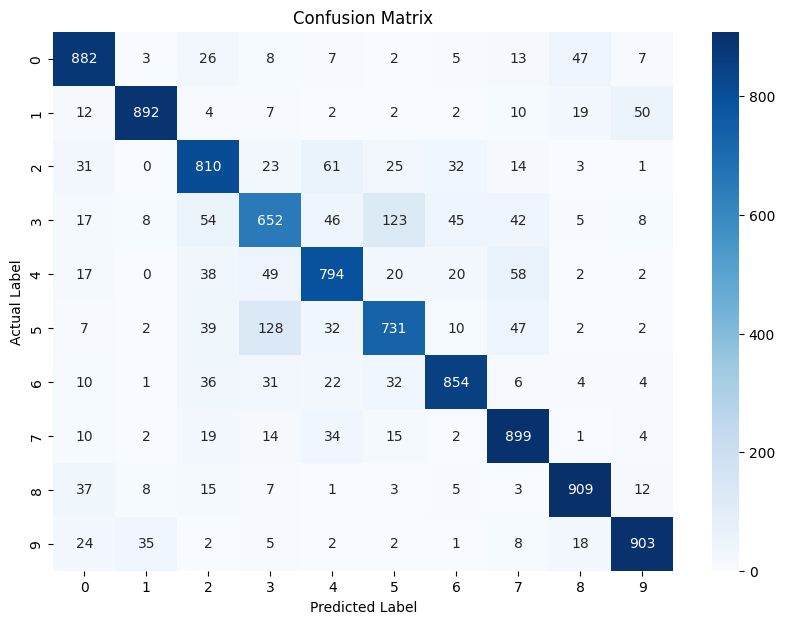

In [44]:
plt.figure(figsize=(10, 7))
sns.heatmap(vgg19cmf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**ResNet50**

In [45]:
inputs = Input(shape=(32, 32, 3))
resized = Resizing(224, 224)(inputs)

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=resized
)
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resizing_2 (Resizing)     │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ resizing_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 195s 479ms/step - accuracy: 0.7278 - loss: 0.8249 - val_accuracy: 0.8402 - val_loss: 0.4594
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 150s 426ms/step - accuracy: 0.8639 - loss: 0.3941 - val_accuracy: 0.8592 - val_loss: 0.4105
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 150s 425ms/step - accuracy: 0.8858 - loss: 0.3207 - val_accuracy: 0.8668 - val_loss: 0.3924
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 149s 424ms/step - accuracy: 0.9014 - loss: 0.2754 - val_accuracy: 0.8726 - val_loss: 0.3757
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 149s 425ms/step - accuracy: 0.9149 - loss: 0.2359 - val_accuracy: 0.8702 - val_loss: 0.3831
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 149s 424ms/step - accuracy: 0.9283 - loss: 0.1968 - val_accuracy: 0.8728 - val_loss: 0.3851
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 149s 424ms/step - accuracy: 0.9444 - loss: 0.1612 - val_accuracy: 0.8646 - val_loss: 0.4130
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 149s 424ms/step - accuracy: 0.9520 -

In [48]:
res50_eval = model.evaluate(x=x_test,y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.8668 - loss: 0.7321


In [49]:
res50_predictions = model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step


In [50]:
res50_predictions = np.argmax(res50_predictions,axis=1)

In [51]:
res50_predictions

array([1, 8, 1, ..., 5, 1, 7])

In [52]:
res50_y_real = y_test.flatten()

In [53]:
res50_cfm = pd.crosstab(res50_y_real,res50_predictions,rownames=['Actual'],colnames=['Predictions'])
res50_cfm

Predictions,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,908,10,11,6,9,1,1,8,34,12
1,9,931,1,7,1,3,2,1,6,39
2,27,0,823,40,43,24,30,9,3,1
3,6,4,21,775,32,87,32,31,3,9
4,5,1,35,29,843,13,29,40,3,2
5,4,0,11,140,20,781,11,32,0,1
6,4,1,16,36,16,7,911,4,3,2
7,4,0,7,17,28,24,2,916,1,1
8,39,16,3,6,6,2,3,2,905,18


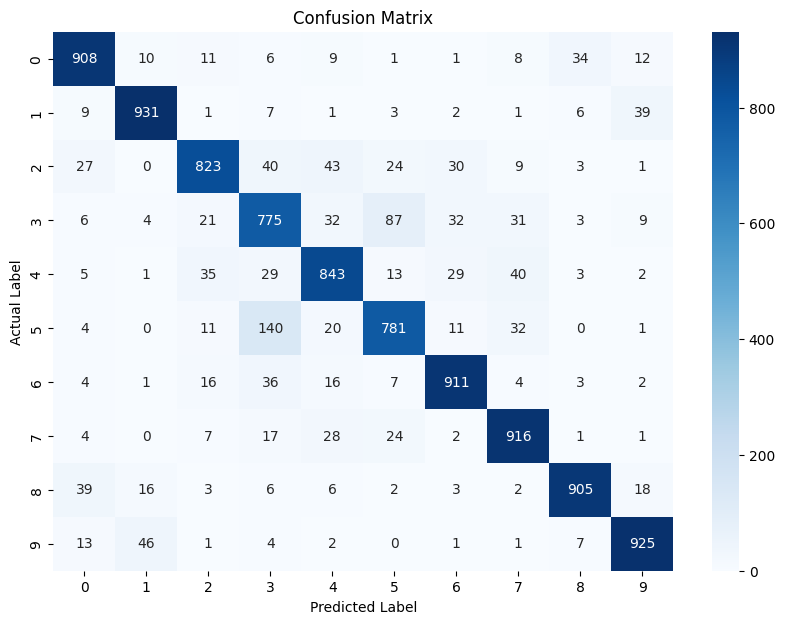

In [54]:
plt.figure(figsize=(10, 7))
sns.heatmap(res50_cfm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**ResNet 152**

In [78]:
input_res152 = Input(shape=(32, 32, 3))
resized_res152 = Resizing(224, 224)(input_res152)

res152_base = ResNet152(
    weights='imagenet',
    include_top=False,
    input_shape = (224,224,3)
)

for layer in res152_base.layers:
    layer.trainable = False

x = res152_base(resized_res152)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.5)(x)
output_res152 = Dense(10, activation='softmax')(x)

res152model = Model(inputs=input_res152, outputs=output_res152)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_3 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet152 (Functional)               │ (None, 7, 7, 2048)          │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,762,720 (227.98 MB)

 Trainable params: 463,498 (1.77 MB)

 Non-trainable params: 58,372,224 (222.67 MB)

 Optimizer params: 926,998 (3.54 MB)

In [79]:
res152model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [80]:
res152_history = res152model.fit(x=X_train,y=Y_train,epochs=4,validation_data=(x_val,y_val))

Epoch 1/4
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 470s 282ms/step - accuracy: 0.5418 - loss: 1.4033 - val_accuracy: 0.8260 - val_loss: 0.5166
Epoch 2/4
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 412s 269ms/step - accuracy: 0.7436 - loss: 0.7864 - val_accuracy: 0.8510 - val_loss: 0.4555
Epoch 3/4
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 412s 269ms/step - accuracy: 0.7649 - loss: 0.7175 - val_accuracy: 0.8560 - val_loss: 0.4474
Epoch 4/4
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 411s 268ms/step - accuracy: 0.7835 - loss: 0.6737 - val_accuracy: 0.8640 - val_loss: 0.3962


In [58]:
evaluation = res152model.evaluate(x=x_test,y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 274ms/step - accuracy: 0.8523 - loss: 0.4537


In [62]:
def get_metrics(y_test,y_pred,model):
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'Printing metrics for {model}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

def roc_auc(y_test,predictions,model):
    y_true_bin = label_binarize(y_test, classes=list(range(10)))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # For each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for all classes
    plt.figure(figsize=(10, 8))
    colors = plt.cm.tab10(np.linspace(0, 1, 10))

    for i,color in zip(range(n_classes),colors):
        plt.plot(fpr[i],tpr[i],color=color,lw=2,label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve (One-vs-Rest) for {model}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [63]:
get_metrics(y_test_vgg16,vgg16_y_pred,'VGG16')

Printing metrics for VGG16
Precision: 0.8282
Recall: 0.8276
F1 Score: 0.8273


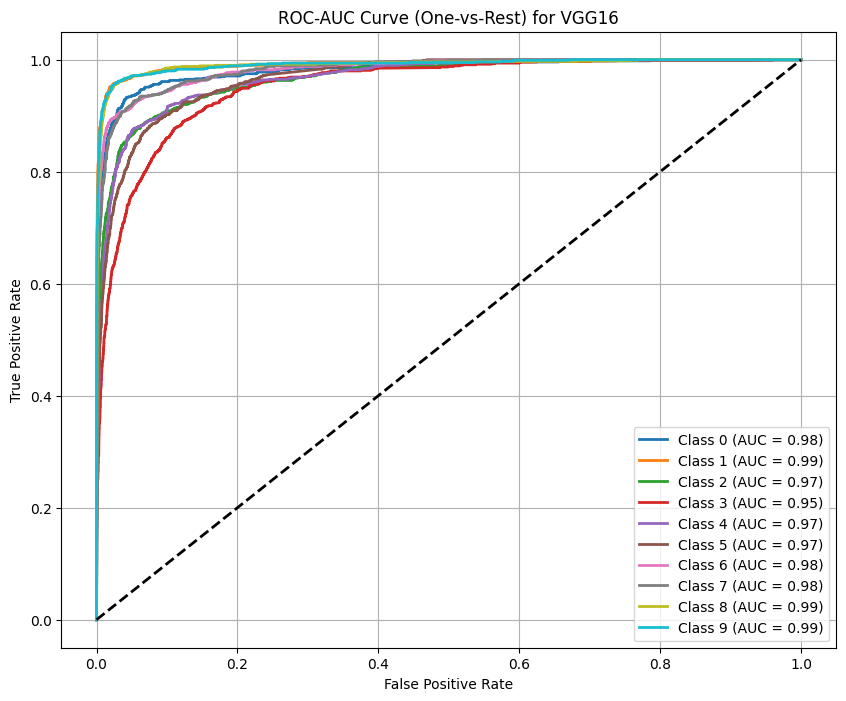

In [64]:
roc_auc(y_test_vgg16,vgg16_predictions,'VGG16')

In [65]:
get_metrics(vgg19_ytest,vgg19_predicitions,'VGG19')

Printing metrics for VGG19
Precision: 0.8323
Recall: 0.8326
F1 Score: 0.8319


In [66]:
vgg19_preds = vgg19_model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 270ms/step


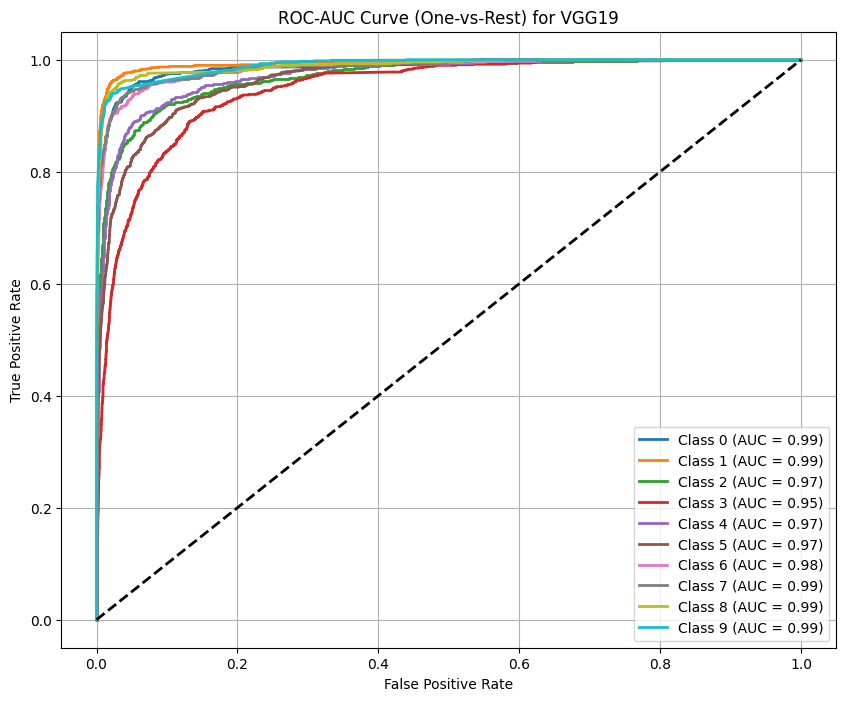

In [67]:
roc_auc(vgg19_ytest,vgg19_preds,'VGG19')

In [68]:
get_metrics(res50_y_real,res50_predictions,'ResNet 50')

Printing metrics for ResNet 50
Precision: 0.8725
Recall: 0.8718
F1 Score: 0.8718


In [69]:
res50_preds = model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 106s 301ms/step


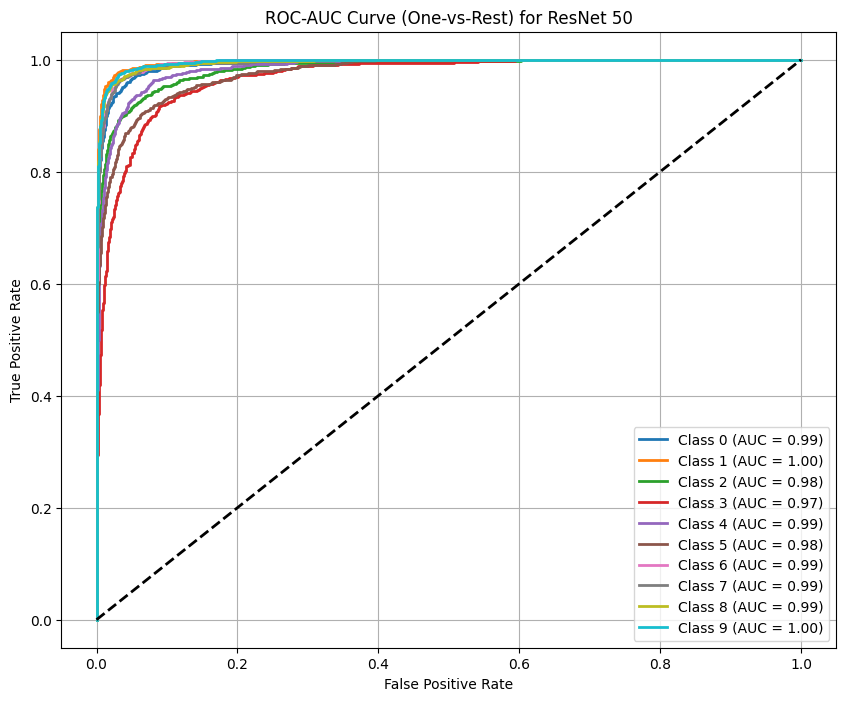

In [70]:
roc_auc(res50_y_real,res50_preds,'ResNet 50')

In [81]:
res152_predictions = res152model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 106s 298ms/step


In [82]:
res152_y_real = y_test.flatten()

In [83]:
res152_y_pred = np.argmax(res152_predictions,axis=1)

In [84]:
get_metrics(res152_y_real,res152_y_pred,'ResNet 152')

Printing metrics for ResNet 152
Precision: 0.8566
Recall: 0.8549
F1 Score: 0.8539


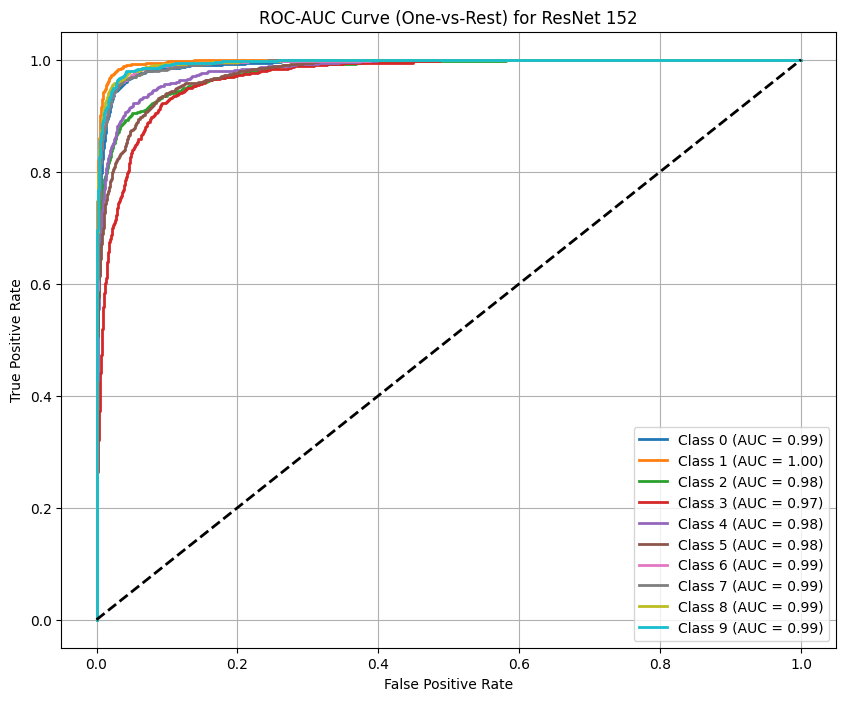

In [85]:
roc_auc(res152_y_real,res152_predictions,'ResNet 152')

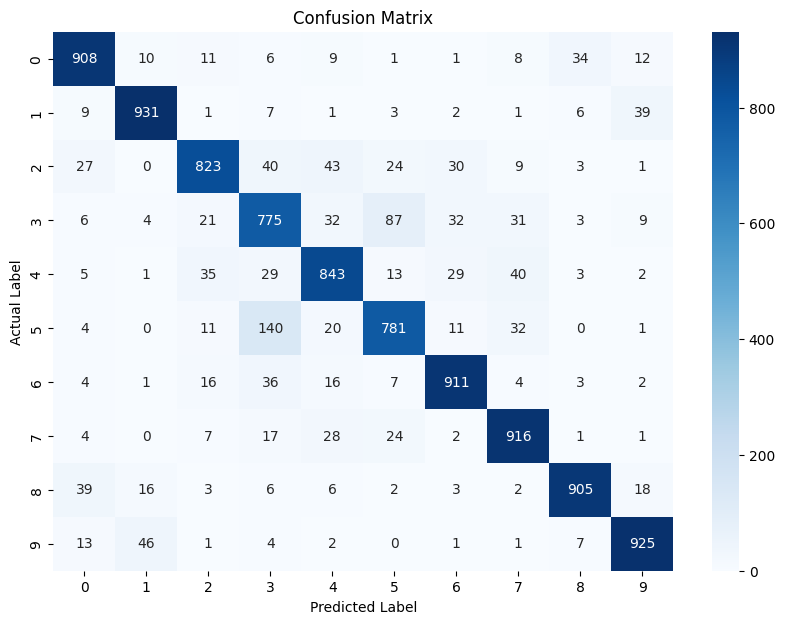

In [86]:
res152_cfm = pd.crosstab(res152_y_real,res152_y_pred,rownames=['Actual'],colnames=['Predictions'])
plt.figure(figsize=(10, 7))
sns.heatmap(res50_cfm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()